In [11]:
### load csv
import pandas as pd
import numpy as np
import re

file_name='HNDB_Progress_Notes_clean.csv'

data=pd.read_csv(file_name,index_col='date_of_service_dttm',parse_dates=True,error_bad_lines=False)

cols=['mrn','note_id','ip_note_type','author_service','note_narr']
data=data[cols]
data.dropna(subset=['mrn','note_narr'])

### for 8980
# file='all_mrns_of_interest.csv'
# mrn_csv=pd.read_csv(file)
# df_8980=mrn_csv[mrn_csv['Source']=='8980']
# mrns_8980=df_8980.MRN.unique()
# mrns_in_PNs=[]
# mrns_not_in_PNs=[]
# print ('Number of 8980 ptxs:',len(mrns_8980))
# count=0
# for mrn in mrns_8980:
#     if mrn in data['mrn'].unique():
#         mrns_in_PNs.append(mrn)
#         count+=1
#     else:
#         mrns_not_in_PNs.append(mrn)
# print ('number of 8980 ptxs in notes:',count)
# print ('mrns with PNs:',mrns_in_PNs)
# print ('mrns without PNs:',mrns_not_in_PNs)


print ('Number of notes:',data.shape[0])

Number of notes: 72695


In [12]:
### filter out for desired services
#print (data.author_service.unique())

#services=['HEMATOLOGY/ONCOLOGY','OTOLARYNGOLOGY','RADIATION ONCOLOGY']
services=['HEMATOLOGY/ONCOLOGY']
data=data[data['author_service'].isin(services)]
print ('Number of notes from relevant services:',data.shape[0])

### for 8980
# file='all_mrns_of_interest.csv'
# mrn_csv=pd.read_csv(file)
# df_8980=mrn_csv[mrn_csv['Source']=='8980']
# mrns_8980=df_8980.MRN.unique()
# count=0
# for mrn in mrns_8980:
#     if mrn in data['mrn'].unique():
#         count+=1
# print ('number of 8980 ptxs in notes:',count)

Number of notes from relevant services: 25593


In [13]:
### load mrns of interest and filter for them
file='all_mrns_of_interest.csv'
# file='UC_recurrent_mrns.csv'
mrn_csv=pd.read_csv(file)

# convert mrns with '-' to without
try:
    mrn_csv.MRN=mrn_csv.MRN.str.replace('-','')
    mrn_csv.MRN=mrn_csv.MRN.astype('int64')
except:
    print('mrns are already in correct form')

mrns=mrn_csv.MRN.unique()
print('Number of unique mrns in val cohort:',len(mrns))

### for 8980
# df_8980=mrn_csv[mrn_csv['Source']=='8980']
# mrns_8980=df_8980.MRN.unique()
# count=0
# for mrn in mrns_8980:
#     if mrn in data['mrn'].unique():
#         count+=1
# print ('number of 8980 ptxs in notes:',count)
# ### for OPTIMA
# df_OPTIMA=mrn_csv[mrn_csv['Source']=='OPTIMA']
# mrns_OPTIMA=df_OPTIMA.MRN.unique()
# count=0
# for mrn in mrns_OPTIMA:
#     if mrn in data['mrn'].unique():
#         count+=1
# print ('number of OPTIMA ptxs in notes:',count)
# ### for non-8980
# df_non8980=mrn_csv[mrn_csv['Source']=='Non-8980']
# mrns_non8980=df_non8980.MRN.unique()
# count=0
# for mrn in mrns_non8980:
#     if mrn in data['mrn'].unique():
#         count+=1
# print ('number of non-8980 ptxs in notes:',count)


#filter data to only include notes from target mrns and only Progress Notes
data=data[data['mrn'].isin(mrns)]
print('Number of target mrns in notes:',len(data.mrn.unique()))
print('Number of notes from validated mrns:',data.shape[0])
print (data.ip_note_type.unique())
data=data[data.ip_note_type=='Progress Notes']
print('Number of Progress notes from target mrns:',data.shape[0])

### print mrns that show up in notes and those that do not
print ('in notes:',data.mrn.unique())
l=[]
for mrn in mrns:
    if mrn not in data.mrn.unique():
        l.append(mrn)
print ('not in notes:',l)


mrns are already in correct form
Number of unique mrns in val cohort: 452
Number of target mrns in notes: 175
Number of notes from validated mrns: 4642
['Progress Notes' 'Consult (Initial)' 'Consult (Follow-Up)']
Number of Progress notes from target mrns: 4590
in notes: [ 852008 1390547 2050963 1566343 1589928 1261329 1868643 2209904 1420705
 1504532 3085711 2460803 2573707 2107646 2714226 3244910 2743967 3324677
 2840501 3231751 2903558 2910738 2979285 3134848 2975979 3074909 3259252
 3108147 3123549 3418273 2661812 3480721 3497265 3142993 3148181 3151830
 3162335 3171632 3199771 3221015 3232866 3249882 3251064 3252015 3260592
 2849915 3272590 3370728 3261049 2913559 3105416 2929012 3054505 2933746
 2954558 2958683 3276187 2975703 3279359 3290497 3292860 2994570 3001074
 3542051 3305006 3307560 3309751 3327545 3331397 3028615 3351851 3351990
 3361810 3375948 3385495 3040452 3044387 3415365 3421057 3423189 3426220
 3439308 3442639 3447609 3448959 3452129 3453332 3456018 3457262 3470980

In [14]:
def carve_out(para,start,end=None):
    '''take out a piece of a paragraph using inputs of the string, and then the start and optionally the end'''
    toReturn=''
    search=re.search(start,para)
    if not search:
        return toReturn
    
    # cut off everything to the left of start
    toReturn=re.split(start,para,maxsplit=1)[1]
    
    # cut off everything to the right of end
    if end != None:
        toReturn=re.split(str(end),toReturn)[0]
    
    return toReturn

def pattern_bank(key):
    HPI_pattern=r'HPI|History of Present Illness|HISTORY OF PRESENT ILLNESS|CHIEF COMPLAINT|Chief Complaint'
    
    Hx_pattern=r'Past Medical History|PAST MEDICAL HISTORY| [Pp][Mm]?[Hh][Xx]|(PAST|Past) 24'
    OncHx_pattern=r'([Oo]nc|ONC)(ology|ologic|ological|OLOGY|ONCOLOGICAL|OLOGIC)? [Hh]([Xx]|istory|ISTORY)'
    Rx_pattern=r'Current Outpatient Prescriptions|Current Medications'
    RoS_pattern=r'Review of Systems|REVIEW OF SYSTEMS|ROS |RoS'
    Misc_pattern=r'ALLERGIES|Allergies|ATTENDING|Additional current complaint'
    
    term_patterns=[Hx_pattern,Rx_pattern,RoS_pattern,Misc_pattern]
    ### 7/14/20 removed onc_hx pattern because I actually want it now for extraction
    HPI_end=''
    for index,pattern in enumerate(term_patterns):
        if index==0:
            HPI_end=pattern
        else:
            HPI_end=HPI_end+'|'+pattern
    
    bank={
        'HPI':[HPI_pattern,HPI_end
              ]
    }
    try:
        return bank[key]
    except:
        return ['','']
def clean_section(para):
    toReturn=para
    if toReturn and (':' == toReturn[0] or '.'==toReturn[0]):
        toReturn=toReturn[1:]
    toReturn=toReturn.strip()
    return toReturn
    
data['HPI']=data.note_narr.apply(carve_out,args=[pattern_bank('HPI')[0],pattern_bank('HPI')[1]])
data['HPI']=data.HPI.apply(clean_section)

print (data.HPI.describe())


def is_big(para):
    if len(para)>1000:
        return True
    else:
        return False

long_ones=data[data.HPI.apply(is_big)]
print ('\nNumber of long notes:',long_ones.shape[0])
long_ones.to_csv('dumpyard.csv')

count     4590
unique    3186
top           
freq       375
Name: HPI, dtype: object

Number of long notes: 1925


In [15]:
### get rid of stuff without HPI - it's worthless
def hasHPI(HPI):
    try:
        if type(HPI) is str and len(HPI)>0:
            return True
        else:
            return False
    except:
        return False
before=str(data.shape[0])
data=data[data.HPI.apply(hasHPI)]
print ('All notes with HPI info: '+before+'->'+str(data.shape[0]))
data.to_csv('dumpyard.csv')

All notes with HPI info: 4590->4215


In [16]:
### past extraction

import re
from nltk.tokenize import sent_tokenize
import spacy
from spacy.matcher import Matcher
import sys
#!{sys.executable} -m pip install datefinder
import dateparser
from datetime import datetime

def extract_HPI(HPI):
    '''takes HPI, returns list of tuples (date,sentence)'''
    try:
        para=HPI
        # start with pre-processing
        para=re.sub('\s{2,}', '. ', para.strip())
        para=para.replace('s/p','.')
        para=para.replace('year','yr')
        para=para.replace(',','!')
        para=para.replace('-','--')
        para=para.replace('..','.')
        #break into sentences and replace the ! because its dumb
        sentences=sent_tokenize(para)
        sentences=[s.replace('!','.') for s in sentences]
        # load spacy stuff
        nlp=spacy.load("en_core_web_sm")
        doc=nlp(para)
        matcher = Matcher(nlp.vocab)
        #define Matcher patterns
        pattern=[{'ENT_TYPE':'DATE','LIKE_NUM':False},{'ENT_TYPE':'DATE','OP':'+'}]
        pattern2=[{"TEXT": {"REGEX":"(\d+/\d+/\d+)"}}]
        pattern3=[{"TEXT": {"REGEX":"(\d+/\d{4})"}}]
        matcher.add('Date Ent Pattern',None,pattern)
        matcher.add('Date Pattern',None,pattern2)
        matcher.add('Date Pattern',None,pattern3)
        # do matching and extraction
        toReturn=[]
        matches=matcher(doc)
        for match_id, start, end in matches:
            match=doc[start:end].text
            date=''
            date=dateparser.parse(match, settings={'PREFER_DAY_OF_MONTH': 'first'})
            if date is not None:
                if (date.year != 2020):
                    #print('\nMatch found:', doc[start:end].text)
                    #print (date)
                    for sent in sentences:
                            if re.search(match,sent) and date is not None:
                                toReturn.append((date,sent))
                                #print (sent)
        return toReturn
    except:
        return []
def extract_past(df):
    '''takes input of df and appends extracted notes to end of it'''
    df_start=df
    data=[]
    mrn=df.iloc[0]['mrn']
    for index,row in df_start.iterrows():
        HPI=row['HPI']
        l=extract_HPI(HPI)
        try:
            for tup in l:
                # want to append: mrn,note_narr/HPI, and date_of_service_dttm
                data.append([mrn,tup[1],tup[1],tup[0]])
        except:
            return df_start
    try:
        df_to_add=pd.DataFrame(data,columns=['mrn','note_narr','HPI','date_of_service_dttm'])
        df_to_add["date_of_service_dttm"] = pd.to_datetime(df_to_add["date_of_service_dttm"])
        df_start["date_of_service_dttm"] = pd.to_datetime(df_start["date_of_service_dttm"])
        df_total=df_start.append(df_to_add)
        df_total=df_total.drop_duplicates(subset=['HPI','date_of_service_dttm'],keep='first')
        df_total=df_total.sort_values(by='date_of_service_dttm')
        return df_total
    except:
        return df_start


# filter down columns
data=pd.read_csv('dumpyard.csv',parse_dates=True)
print (data.columns)
cols=['mrn','note_narr','HPI','date_of_service_dttm']
data=data[cols]
print (data.columns)
print (data.index)
print ('number notes:',data.shape[0])

### get unique mrns
unique_mrns=data.mrn.unique()
#create list of dataframes - each represents an mrn
ptx_info=[]
for mrn in unique_mrns:
    df_sub=data[data.mrn==mrn]
    ptx_info.append(df_sub)

for index,ptx in enumerate(ptx_info):
    ptx_info[index]=extract_past(ptx)
    print('Completed ptx '+str(index+1)+'/'+str(len(ptx_info)))
    
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)
        
# set index back to datetime index
data=df_rebuilt.set_index('date_of_service_dttm')
print (data.shape[0])
data.to_csv('dumpyard.csv')


Index(['date_of_service_dttm', 'mrn', 'note_id', 'ip_note_type',
       'author_service', 'note_narr', 'HPI'],
      dtype='object')
Index(['mrn', 'note_narr', 'HPI', 'date_of_service_dttm'], dtype='object')
RangeIndex(start=0, stop=4215, step=1)
number notes: 4215


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Completed ptx 1/171
Completed ptx 2/171
Completed ptx 3/171
Completed ptx 4/171
Completed ptx 5/171
Completed ptx 6/171
Completed ptx 7/171
Completed ptx 8/171
Completed ptx 9/171
Completed ptx 10/171
Completed ptx 11/171
Completed ptx 12/171
Completed ptx 13/171
Completed ptx 14/171
Completed ptx 15/171
Completed ptx 16/171
Completed ptx 17/171
Completed ptx 18/171
Completed ptx 19/171
Completed ptx 20/171
Completed ptx 21/171
Completed ptx 22/171
Completed ptx 23/171
Completed ptx 24/171
Completed ptx 25/171
Completed ptx 26/171
Completed ptx 27/171
Completed ptx 28/171
Completed ptx 29/171
Completed ptx 30/171
Completed ptx 31/171
Completed ptx 32/171
Completed ptx 33/171
Completed ptx 34/171
Completed ptx 35/171
Completed ptx 36/171
Completed ptx 37/171
Completed ptx 38/171
Completed ptx 39/171
Completed ptx 40/171
Completed ptx 41/171
Completed ptx 42/171
Completed ptx 43/171
Completed ptx 44/171
Completed ptx 45/171
Completed ptx 46/171
Completed ptx 47/171
Completed ptx 48/171
C

In [17]:
from nltk import download,tokenize

def get_first_sentence(para):
    '''takes paragraph, returns first sentence'''
    try:
        sentences=tokenize.sent_tokenize(para)
        return sentences[0]
    except:
        return ''
    
    
def getStage(para):
    '''gets TNM stage of tumor from input string'''
    pattern=r'[cpyr]?([Tt]\d\-)?[Tt][\dxX](\w)?( )?([Nn]\d\-)?[Nn][\dxX]?(\w)?( )?[Mm]?(\d|[Xx])?'
    search=re.search(pattern,para)
    stage=''
    if search:
        stage=search.group()
    return stage
data['First_Sent']=data.HPI.apply(get_first_sentence)
data['TNM_stage']=data.HPI.apply(getStage)
data.to_csv('dumpyard.csv')

print (data.TNM_stage.describe())

count     7415
unique     144
top           
freq      4627
Name: TNM_stage, dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


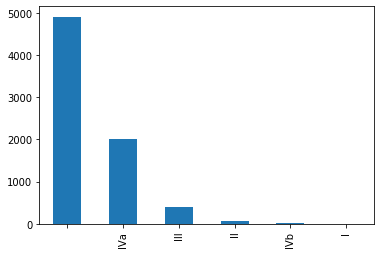

In [18]:
### add staging
import matplotlib.pyplot as plt

df=pd.read_csv('dumpyard.csv',parse_dates=True,index_col='date_of_service_dttm')
### define functions to get T value, N value, M value
def getT(stage):
    '''gets the value for T from stage'''
    try:
        toReturn=stage.upper().split('N')[0]
        if toReturn[0] !='T':
            toReturn=toReturn[1:]    
        toReturn=toReturn[1:].strip()
        return toReturn
    except:
        return np.nan
def getN(stage):
    '''gets value for N from stage'''
    try:
        toReturn=stage.upper().split('M')[0]
        toReturn=toReturn.split('N')[1].strip()
        return toReturn
    except:
        return np.nan
def getM(stage,sent):
    '''gets values for M from stage, assumes no mention of M is the same as M0'''
    try:
        if hasMetsLanguage(sent):
            return '1'
        elif 'M' not in stage:
            return '0'
        else:
            toReturn=stage.upper().split('M')[1].strip()
            return toReturn
    except:
        return np.nan

df['T']=df.TNM_stage.apply(getT)
df['N']=df.TNM_stage.apply(getN)

Ms=[]
for index,row in df.iterrows():
    stage=row['TNM_stage']
    sent=row['First_Sent']
    Ms.append(getM(stage,sent))
df['M']=Ms

def hasNegativeLanguage(sentence):
    '''check if a sentence expresses negative language'''
    pattern=r'[Nn]o|[Nn][Ee][Dd]|[Ww]ithout|does not have|[Ss]uspicious|Metastatic Sites NA|concerned about|negative|lack of|(likely|may) represent'
    search=re.search(pattern,sentence)
    flag=False
    if search:
        flag=True
    return flag
def hasMetsLanguage(sentence):
    '''check if a sentence indicates a recurrent tumor or metastasis'''
    flag=False
    search=re.search(r'[Mm]et(s|astatic|astas[ie]s) ',sentence)
    if search and not hasNegativeLanguage(sentence):
        flag=True
    return flag
            
def get_Cancer_Stage(T,N,M):
    '''get stage of disease from TNM inputs, using AJCC 7th criteria'''
    stage=''
    if str(M)=='1':
        stage='IVc'
    elif len(str(T))==0 and len(str(N))==0:
        stage=''
    elif str(T)=='1' and str(N)=='0':
        stage='I'
    elif str(T)=='2' and str(N)=='0':
        stage='II'
    elif (str(T)=='3' and str(N)<='1') or (str(T)<='2' and str(N)=='1'):
        stage='III'
    elif ((str(T)=='4' or str(T)=='4A') and (str(N)<='2C')) or (str(T)>='1' and str(T)<'4' and str(N)>='2' and str(N)<='2C'):
        stage='IVa'
    elif str(T)=='4B' or (str(N)>'3' and str(N)<'5'):
        stage='IVb'
    else:
        stage=''
    return stage

cancer_stages=[]
for index,row in df.iterrows():
    T=row['T']
    N=row['N']
    M=row['M']
    cancer_stages.append(get_Cancer_Stage(T,N,M))
df['Cancer_stage']=cancer_stages

print (df.Cancer_stage.value_counts().plot(kind='bar'))
plt.savefig('Recur_Db_Ptx_by_Stage.png')
df=df.sort_values(by=['date_of_service_dttm'])
mrns=df.mrn.unique()
sub_dfs=[]
for mrn in mrns:
    sub_df=df[df['mrn']==mrn]
    sub_dfs.append(sub_df)
df_rebuilt=None
for index,sub_df in enumerate(sub_dfs):
    if index==0:
        df_rebuilt=sub_df
    else:
        df_rebuilt=df_rebuilt.append(sub_df)
df=df_rebuilt
df.to_csv('HNDB Progress Notes Processed.csv')

In [19]:
from nltk import download,tokenize

df=pd.read_csv('HNDB Progress Notes Processed.csv', parse_dates=True,index_col='date_of_service_dttm')
def find_the_diff(para1,para2):
    '''returns all the different sentences between two paragraphs, organized as a single string'''
    sentences1=tokenize.sent_tokenize(para1)
    sentences2=tokenize.sent_tokenize(para2)
    new_sentences=[]
    for sentence in sentences2:
        if sentence not in sentences1:
            new_sentences.append(sentence)
    toReturn=''
    for sentence in new_sentences:
        toReturn=toReturn+sentence+' '
    return toReturn

def list_of_diffs(df,col_name1,col_name2):
    '''returns a list of the differences in a dataframe between two columns'''
    toReturn=[]
    for index,row in df.iterrows():
        if index==0:
            toReturn.append('')
        else:
            para1=row[col_name1]
            para2=row[col_name2]
            diffs=find_the_diff(para1,para2)
            toReturn.append(diffs)
    return toReturn
def hide_old_sentences(df):
    sentences=[]
    new_HPIs=[]
    for index,row in df.iterrows():
        sents=tokenize.sent_tokenize(row['HPI'])
        new_HPI=''
        for s in sents:
            if s not in sentences:
                sentences.append(s)
                new_HPI=new_HPI+s+' '
        new_HPIs.append(new_HPI)
    df['filtered_HPI']=new_HPIs
    return df


### get unique mrns
unique_mrns=df.mrn.unique()
#create list of dataframes - each represents an mrn
ptx_info=[]
for mrn in unique_mrns:
    df_sub=df[df.mrn==mrn]
    ptx_info.append(df_sub)

for index,ptx in enumerate(ptx_info):
    ptx_info[index]['last_HPI']=ptx_info[index]['HPI'].shift(1)
    ptx_info[index] = ptx_info[index].replace(np.nan, '', regex=True)
    ptx_info[index]['changes_in_HPI']=list_of_diffs(ptx_info[index],'last_HPI','HPI')
    ptx_info[index]=hide_old_sentences(ptx_info[index])
    
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)
df=df_rebuilt
df.index = df.index.normalize()
df.to_csv('HNDB Progress Notes Processed.csv')

C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
